In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = np.load('Xhat_centeredmean_deci1.npy')
data.shape

(8, 20, 26)

In [3]:
# data = np.mean(data, axis=2)
data.shape

(8, 20, 26)

In [4]:
# I know that this could be done in a more elegant way, but I'm in a hurry

data_5 = data[:,5,:]
data_6 = data[:,6,:]
data_11 = data[:,11,:]
data_12 = data[:,12,:]
data_13 = data[:,13,:]
data_17 = data[:,17,:]
data_18 = data[:,18,:]

data_5_6 = np.mean(np.array([data_5, data_6]), axis=0)
data_11_12 = np.mean(np.array([data_11, data_12]), axis=0)
data_12_13 = np.mean(np.array([data_12, data_13]), axis=0)
data_17_18 = np.mean(np.array([data_17, data_18]), axis=0)

In [5]:
data_5_6.shape

(8, 26)

In [6]:
rows = []
for subject in range (data.shape[1]):
    for orientation in range(data.shape[0]):
        rows.append([data_5_6[orientation, subject], orientation, subject])
df_5_6 = pd.DataFrame(rows, columns=['error', 'orientation', 'subject'])

rows = []
for subject in range (data.shape[1]):
    for orientation in range(data.shape[0]):
        rows.append([data_11_12[orientation, subject], orientation, subject])
df_11_12 = pd.DataFrame(rows, columns=['error', 'orientation', 'subject'])

rows = []
for subject in range (data.shape[1]):
    for orientation in range(data.shape[0]):
        rows.append([data_12_13[orientation, subject], orientation, subject])
df_12_13 = pd.DataFrame(rows, columns=['error', 'orientation', 'subject'])

rows = []
for subject in range (data.shape[1]):
    for orientation in range(data.shape[0]):
        rows.append([data_17_18[orientation, subject], orientation, subject])
df_17_18 = pd.DataFrame(rows, columns=['error', 'orientation', 'subject'])



Text(0, 0.5, 'Channel response (a. u.)')

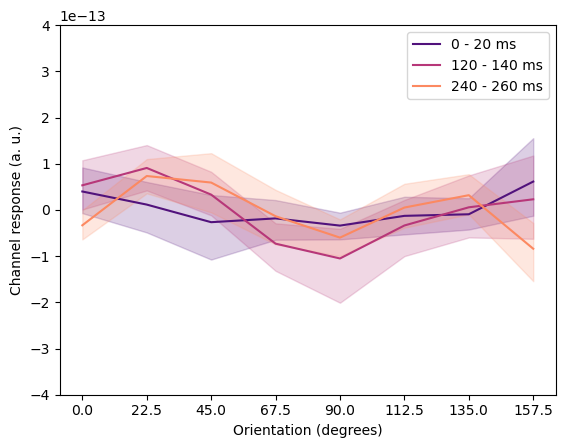

In [15]:
numC = 8
angles = [i * 180./numC for i in range(numC)]
x_labels = np.array(angles)
custom_x_positions = range(len(x_labels))
sns.set_palette(sns.color_palette("magma", 3))

sns.lineplot(x='orientation', y='error', data=df_5_6, label = '0 - 20 ms')
sns.lineplot(x='orientation', y='error', data=df_11_12, label = '120 - 140 ms')
# sns.lineplot(x='orientation', y='error', data=df_12_13, label = '140 - 160 ms')
sns.lineplot(x='orientation', y='error', data=df_17_18, label = '240 - 260 ms')

plt.legend()
max_y_value = 4e-13
plt.ylim(-max_y_value, max_y_value)
plt.xlabel('Orientation (degrees)')
plt.xticks(custom_x_positions, x_labels)
plt.ylabel('Channel response (a. u.)')
# 5 - 0
# 6 - 20
# 7 - 40
# 8 - 60
# 9 - 80
# 10 - 100
# 11 - 120
# 12 - 140
# 13 - 160
# 14 - 180
# 15 - 200
# 16 - 220
# 17 - 240
# 18 - 260




In [8]:
#create a dataframe with columns subject, orientation, value
df = pd.DataFrame(columns=['subject', 'orientation', 'value'])
rows = []
for subject in range(data.shape[2]):
    for orientation in range(data.shape[0]):
        for value in range(data.shape[1]):
            if value in [11,12]:
                rows.append([subject, orientation, data[orientation, value, subject]])
df = pd.DataFrame(rows, columns=['subject', 'orientation', 'value'])

<Axes: xlabel='orientation', ylabel='value'>

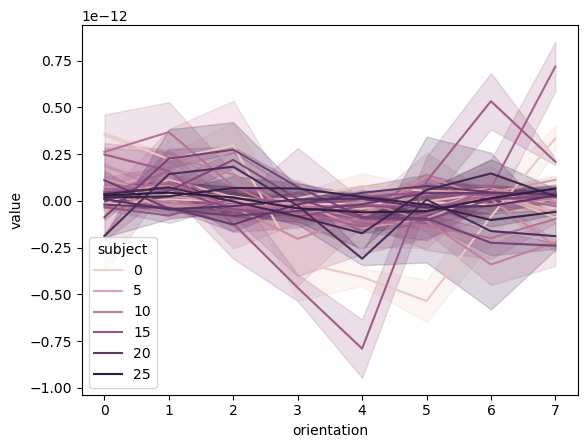

In [9]:
sns.lineplot(x='orientation', y='value', hue='subject', data=df)

In [10]:
data = np.load('Xhat_centeredmean_unshifted.npy')

In [11]:
data.shape

(8, 8, 20, 26)

In [12]:
data = np.mean(data, axis=2)

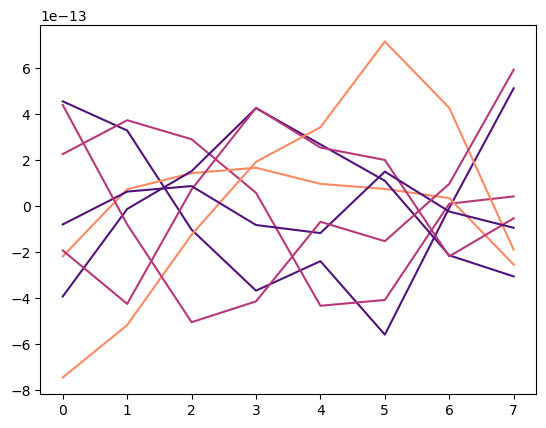

In [13]:
plt.plot(data[:,:,16])
